In [2]:
# Necessary imports
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import inflect
import re

In [3]:
beer_df = pd.read_csv('Beer Train Data Set.csv')
test_df = pd.read_csv('Beer Test Data Set.csv')

In [4]:
beer_df.isnull().sum()

ABV                    15130
Brewing Company            0
Food Paring                0
Glassware Used             0
Beer Name                  0
Ratings                    0
Style Name                 0
Cellar Temperature      6781
Serving Temperature      193
Score                      0
dtype: int64

In [5]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185643 entries, 0 to 185642
Data columns (total 10 columns):
ABV                    170513 non-null float64
Brewing Company        185643 non-null int64
Food Paring            185643 non-null object
Glassware Used         185643 non-null object
Beer Name              185643 non-null int64
Ratings                185643 non-null object
Style Name             185643 non-null object
Cellar Temperature     178862 non-null object
Serving Temperature    185450 non-null object
Score                  185643 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 14.2+ MB


In [6]:
beer_df.describe()

,ABV,Brewing Company,Beer Name,Score
count,170513.000000,185643.000000,185643.000000,185643.000000
mean,6.354961,7008.757659,83738.220111,3.198432
std,1.907205,3914.168053,48520.065146,1.358862
min,0.010000,0.000000,0.000000,0.000000
25%,5.000000,3825.000000,41232.500000,3.270000
50%,6.000000,7111.000000,83335.000000,3.710000
75%,7.200000,10402.000000,125148.500000,3.970000
max,80.000000,13541.000000,168534.000000,5.000000


In [7]:
beer_df.columns

Index(['ABV', 'Brewing Company', 'Food Paring', 'Glassware Used', 'Beer Name',
       'Ratings', 'Style Name', 'Cellar Temperature', 'Serving Temperature',
       'Score'],
      dtype='object')

In [8]:
beer_df._get_numeric_data().columns

Index(['ABV', 'Brewing Company', 'Beer Name', 'Score'], dtype='object')

In [9]:
def split_numeric_cat_cols(df):
    num_col = df._get_numeric_data().columns
    cat_col = set(df.columns) - set(num_col)
    return num_col,cat_col

In [10]:
beer_num_cols, beer_cat_cols = split_numeric_cat_cols(beer_df)

In [11]:
beer_df[beer_df.duplicated(['Beer Name'])].shape

(32498, 10)

In [12]:
beer_df.shape

(185643, 10)

In [13]:
beer_df.isnull().sum()

ABV                    15130
Brewing Company            0
Food Paring                0
Glassware Used             0
Beer Name                  0
Ratings                    0
Style Name                 0
Cellar Temperature      6781
Serving Temperature      193
Score                      0
dtype: int64

#### Note:
1. ABV, Cellar Temperature and Serving Temp have missing values

In [14]:
def split_X_y(df):
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    return X,y

# Categorical columns

## Food Pairing

In [321]:
print(beer_df['Food Paring'].value_counts().sort_values(ascending=True).head())

(Chocolate,Salad,Dessert,Apritif)                                             1
(Dessert,Aperitif)                                                           18
(Aperitif)Meat(Fish,Shellfish,Salmon)                                        47
(Japanese)                                                                   58
Cheese(sharpBlue,Cheddar,tangyBrick,Edam,Feta)General(Aperitif,Digestive)    60
Name: Food Paring, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text xticklabel objects>)

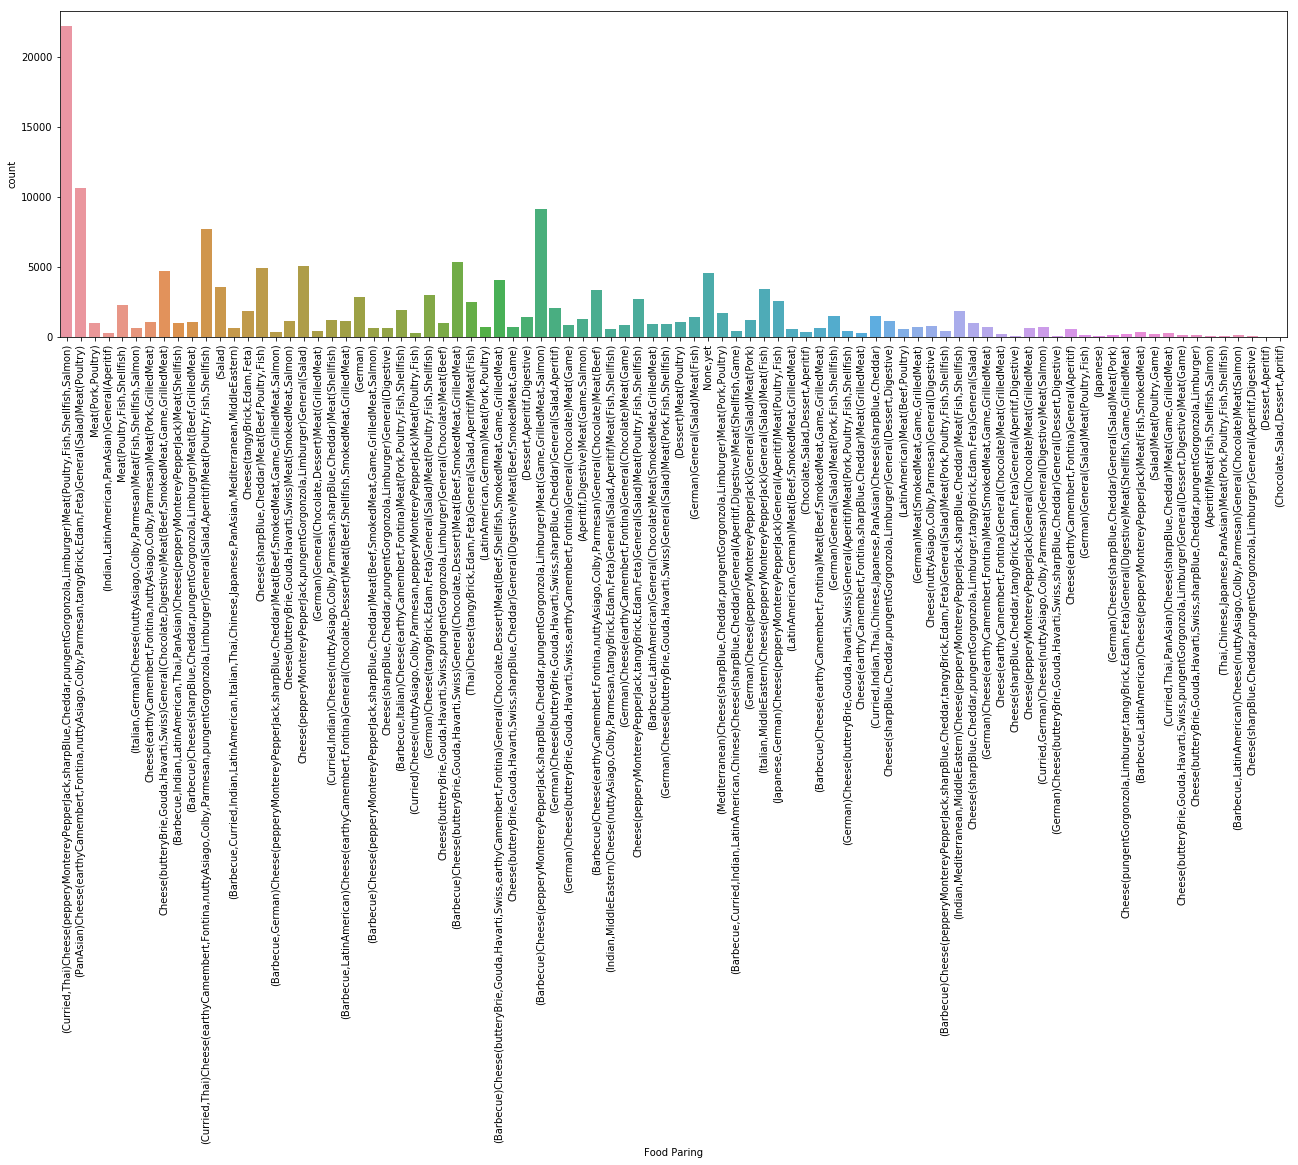

In [19]:
plt.figure(figsize=(22,6))
sns.countplot(beer_df['Food Paring'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text xticklabel objects>)

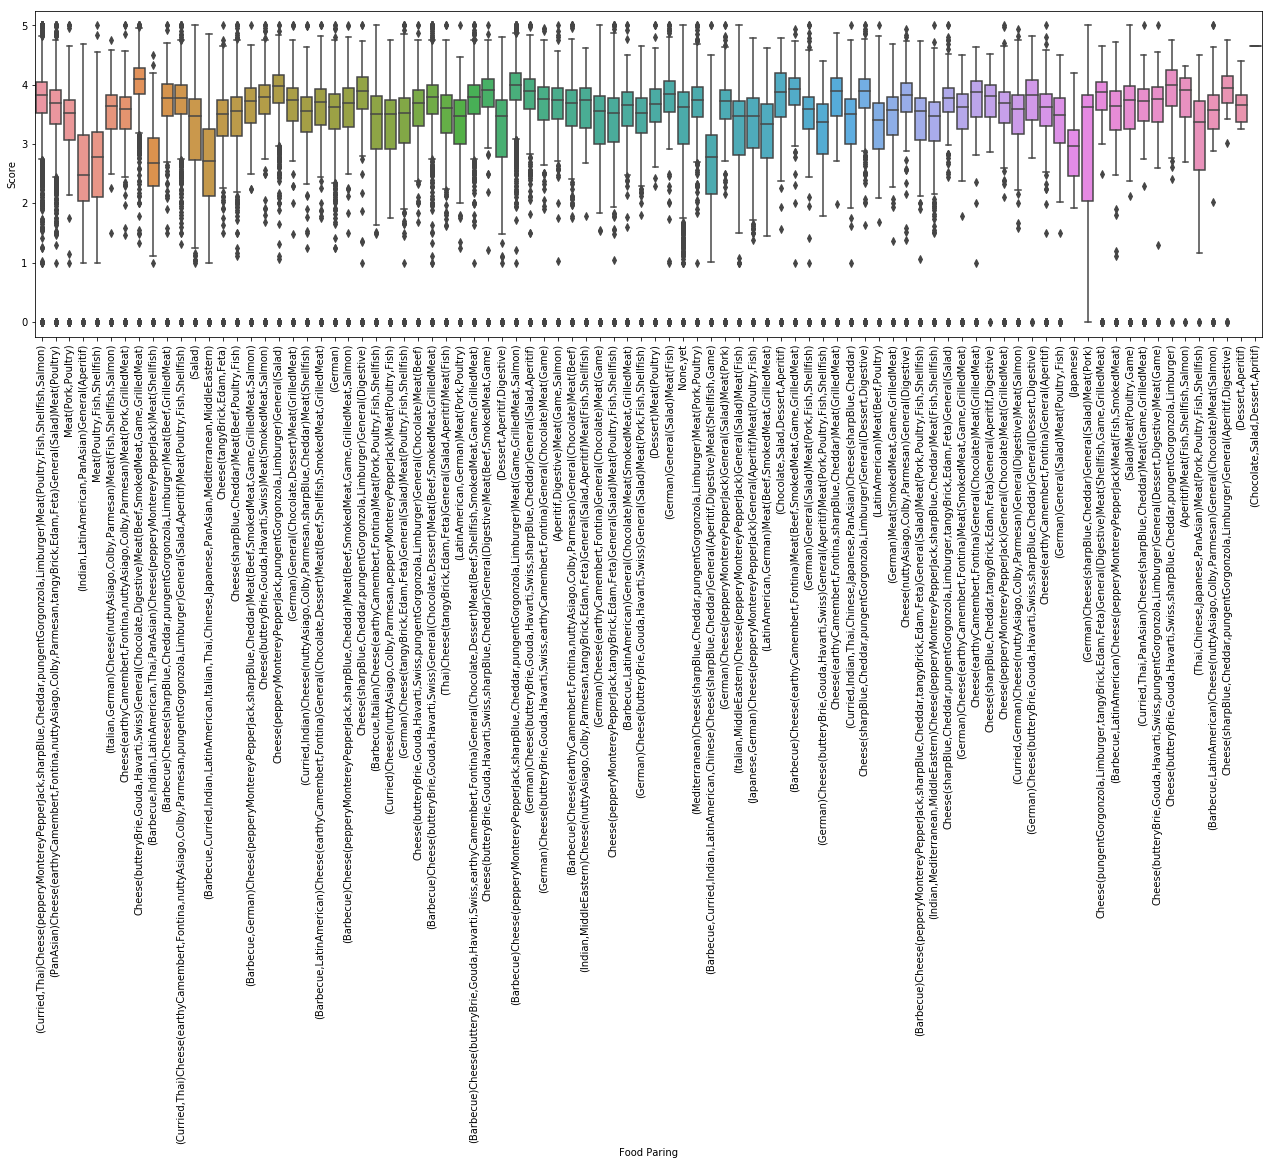

In [20]:
plt.figure(figsize=(22,6))
sns.boxplot('Food Paring','Score',data=beer_df)
plt.xticks(rotation=90)

## Glassware Used

In [322]:
beer_df['Glassware Used'].value_counts().head()

PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein)           72164
Snifter,Tulip,OversizedWineGlass                                13407
PintGlass(orBecker,Nonic,Tumbler),Tulip,OversizedWineGlass       7694
PintGlass(orBecker,Nonic,Tumbler),Snifter,OversizedWineGlass     5298
PilsenerGlass(orPokal)                                           5171
Name: Glassware Used, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

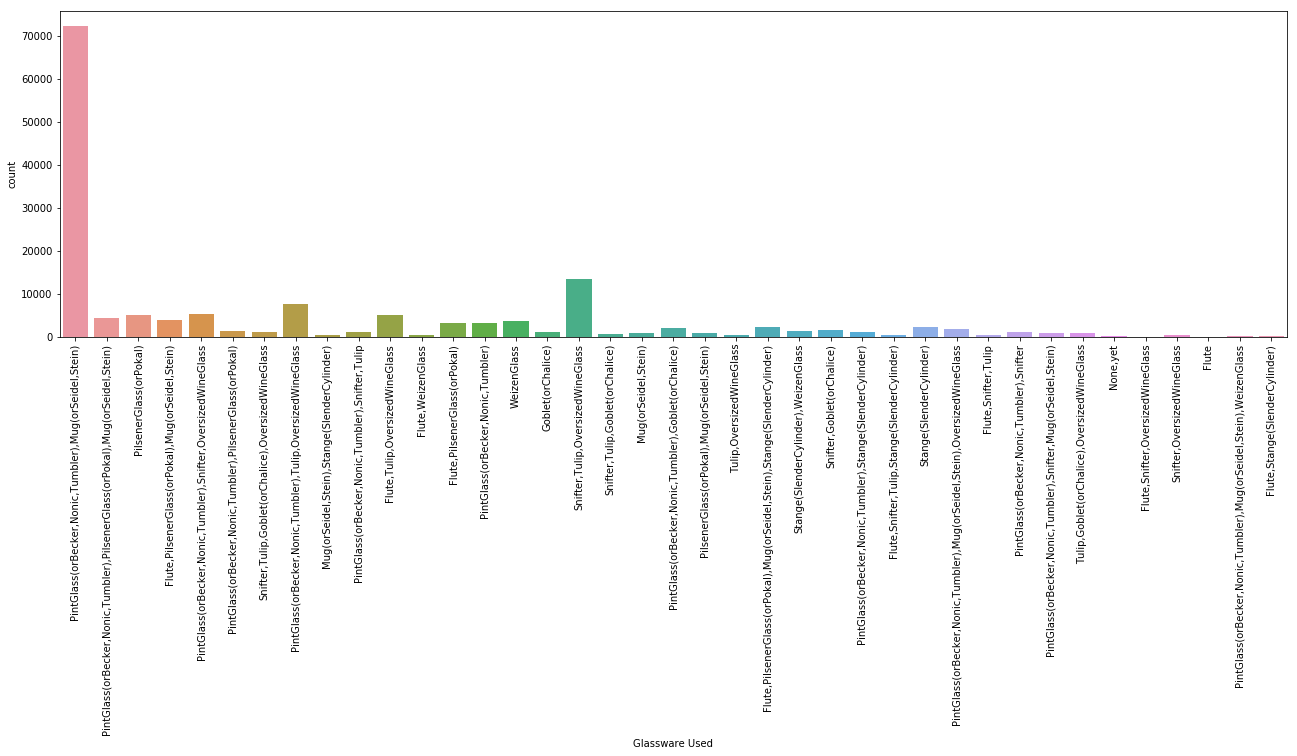

In [22]:
plt.figure(figsize=(22,6))
sns.countplot(beer_df['Glassware Used'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

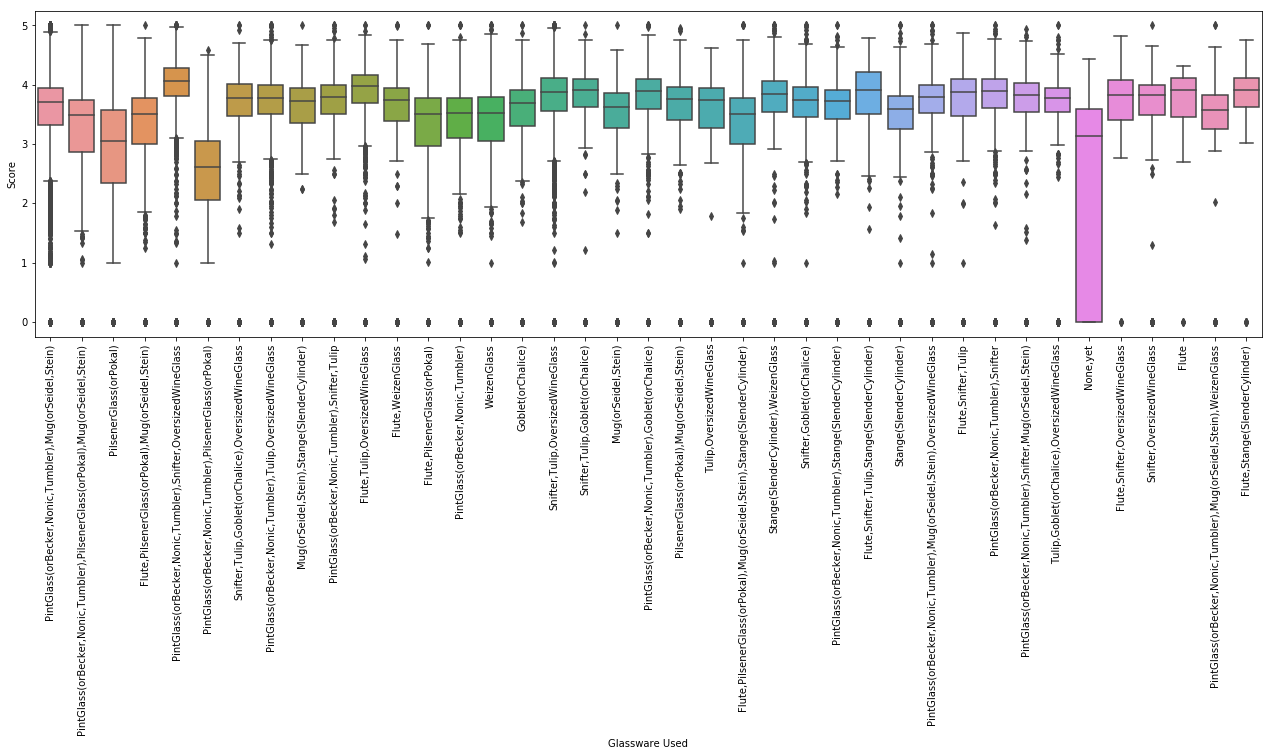

In [23]:
plt.figure(figsize=(22,6))
sns.boxplot('Glassware Used','Score',data=beer_df)
plt.xticks(rotation=90)

## Style Name

In [323]:
beer_df['Style Name'].value_counts().head()

AmericanIPA                  22224
AmericanPaleAle(APA)         10666
AmericanDoubleImperialIPA     9116
SaisonFarmhouseAle            7694
AmericanPorter                5369
Name: Style Name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text xticklabel objects>)

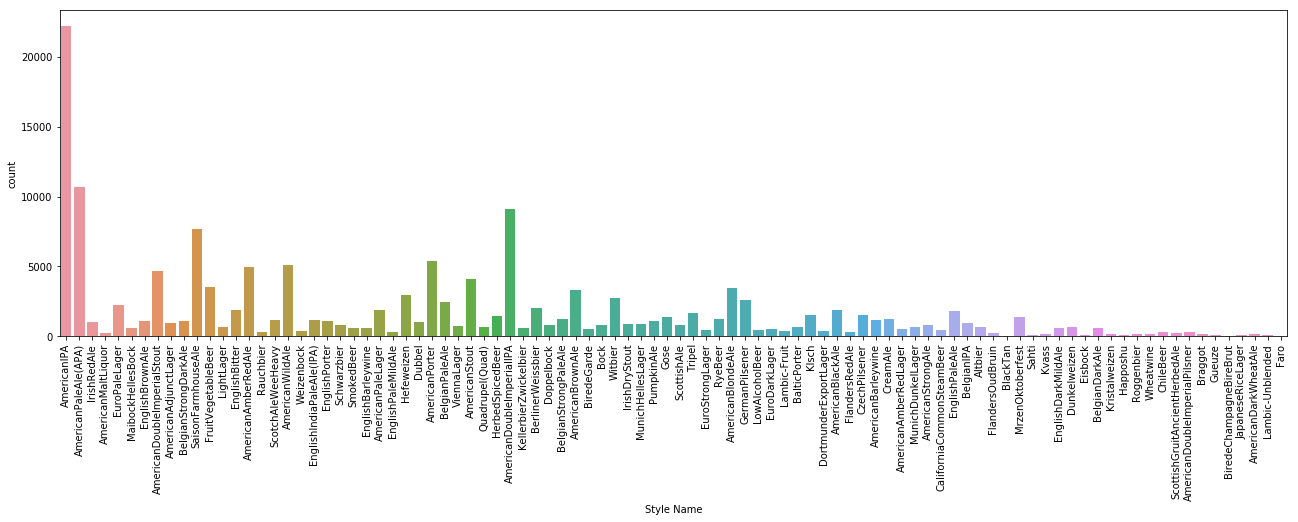

In [25]:
plt.figure(figsize=(22,6))
sns.countplot(beer_df['Style Name'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text xticklabel objects>)

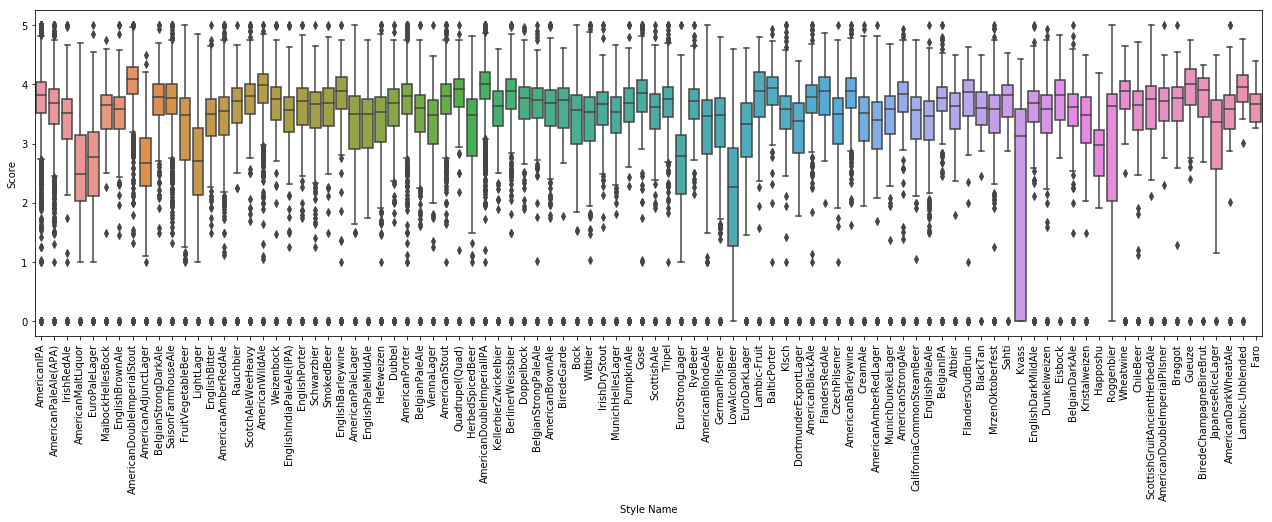

In [26]:
plt.figure(figsize=(22,6))
sns.boxplot('Style Name','Score',data=beer_df)
plt.xticks(rotation=90)

## Brewing Company

In [324]:
beer_df['Brewing Company'].value_counts().head()

12366    331
10481    320
8507     312
9822     282
6942     263
Name: Brewing Company, dtype: int64

(array([    0,     1,     2, ..., 12916, 12917, 12918]),
 <a list of 12919 Text xticklabel objects>)

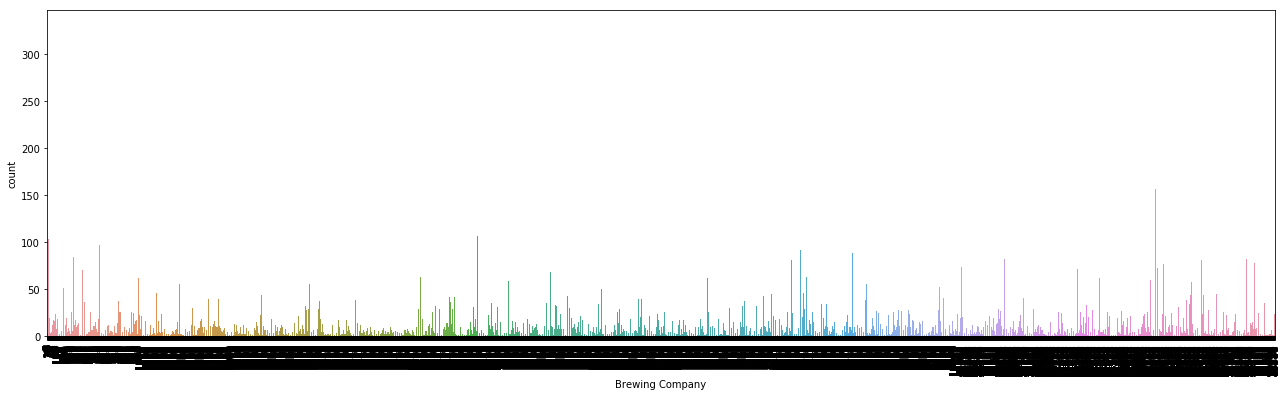

In [28]:
plt.figure(figsize=(22,6))
sns.countplot(beer_df['Brewing Company'])
plt.xticks(rotation=90)

In [29]:
beer_df['Brewing Company'].dtype

dtype('int64')

In [30]:
beer_df['Brewing Company'] = beer_df['Brewing Company'].astype('object',copy=False)
beer_df['Brewing Company'].dtype

dtype('O')

In [31]:
beer_df.dtypes

ABV                    float64
Brewing Company         object
Food Paring             object
Glassware Used          object
Beer Name                int64
Ratings                 object
Style Name              object
Cellar Temperature      object
Serving Temperature     object
Score                  float64
dtype: object

## Beer Name

In [325]:
beer_df['Beer Name'].value_counts().head()

168534    1
56192     1
56190     1
56189     1
56188     1
Name: Beer Name, dtype: int64

In [33]:
beer_df['Beer Name'].nunique()

153145

In [34]:
beer_df['Beer Name'].dtype

dtype('int64')

In [35]:
beer_df['Beer Name'] = beer_df['Beer Name'] .astype('object',copy=False)
beer_df['Beer Name'].dtype

dtype('O')

In [36]:
beer_df.dtypes

ABV                    float64
Brewing Company         object
Food Paring             object
Glassware Used          object
Beer Name               object
Ratings                 object
Style Name              object
Cellar Temperature      object
Serving Temperature     object
Score                  float64
dtype: object

## Cellular Temperature

In [37]:
beer_df['Cellar Temperature'].value_counts(dropna=False)

40-45    75360
35-40    40556
45-50    31343
NaN       5886
Name: Cellar Temperature, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

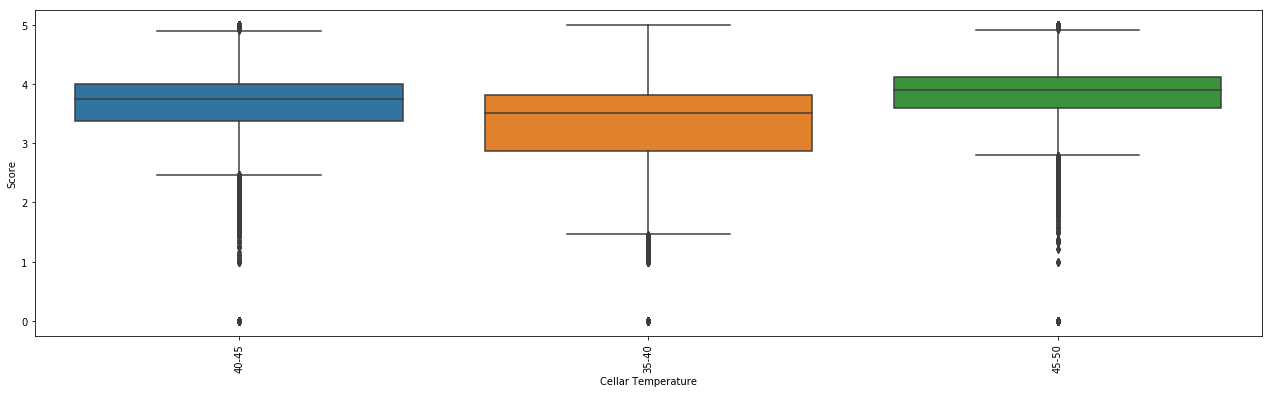

In [38]:
plt.figure(figsize=(22,6))
sns.boxplot('Cellar Temperature','Score',data=beer_df)
plt.xticks(rotation=90)

## Serving Temperature

In [39]:
beer_df['Serving Temperature'].value_counts(dropna=False)

45-50    91089
40-45    39290
50-55    21387
35-40     1206
NaN        173
Name: Serving Temperature, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

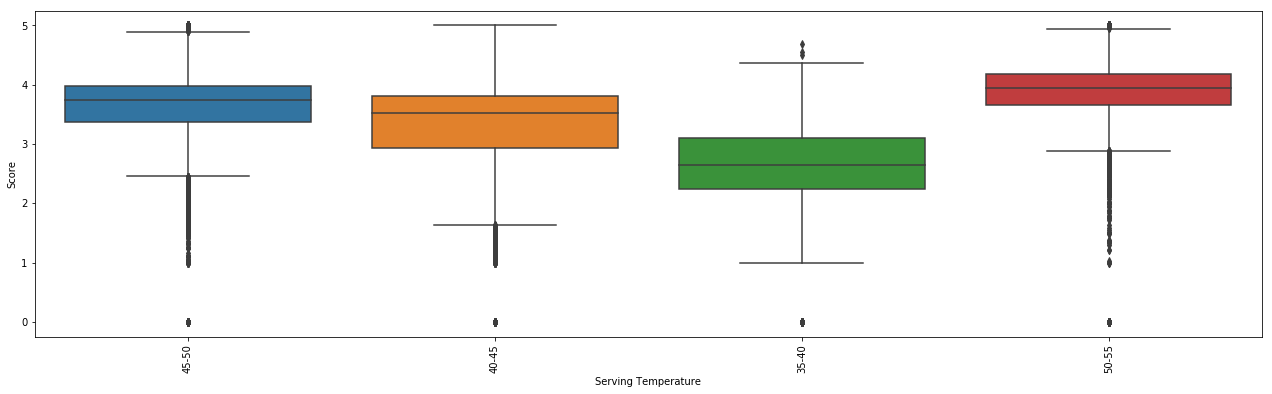

In [40]:
plt.figure(figsize=(22,6))
sns.boxplot('Serving Temperature','Score',data=beer_df)
plt.xticks(rotation=90)

In [41]:
beer_df['Serving Temperature'].isnull().sum()

173

## ABV

In [42]:
sns.sc

NaN       11433
 5.00     10666
 6.00      7805
 5.50      7093
 7.00      5946
 6.50      5905
 4.50      5110
 8.00      4548
 5.20      4412
 4.80      3615
 7.50      3096
 6.20      2962
 5.60      2877
 5.80      2865
 5.40      2800
 4.00      2791
 9.00      2661
 5.30      2608
 8.50      2595
 4.70      2555
 6.80      2509
 4.90      2430
 5.10      2143
 6.30      2035
 10.00     1985
 7.20      1977
 5.70      1952
 4.20      1900
 6.70      1839
 4.60      1688
          ...  
 4.74         1
 75.00        1
 7.92         1
 4.11         1
 10.76        1
 11.63        1
 23.00        1
 3.59         1
 12.01        1
 9.89         1
 9.61         1
 8.38         1
 9.07         1
 11.33        1
 9.22         1
 3.13         1
 7.78         1
 11.54        1
 7.64         1
 10.31        1
 8.99         1
 4.12         1
 30.86        1
 11.32        1
 13.09        1
 8.52         1
 19.30        1
 17.31        1
 9.12         1
 10.28        1
Name: ABV, Length: 677, 

In [43]:
beer_df.ABV.nunique()

676

In [44]:
beer_df.ABV.mean()

6.382095588235026

In [45]:
beer_df.ABV.min()

0.01

In [46]:
beer_df.ABV.max()

80.0

In [47]:
beer_df.ABV.median()

6.0

## Rating

In [58]:
beer_df.sort_values(by=['Ratings'], ascending=False)

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
116062,8.20,9929,"(Curried,Thai)Cheese(earthyCamembert,Fontina,n...","PintGlass(orBecker,Nonic,Tumbler),Tulip,Oversi...",117203,999,SaisonFarmhouseAle,45-50,45-50,4.07
114005,6.00,6529,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",65956,999,AmericanIPA,40-45,45-50,4.32
71834,4.50,5795,(German)General(Salad)Meat(Fish),"Stange(SlenderCylinder),WeizenGlass",87662,999,Gose,40-45,45-50,3.89
112012,4.20,6407,"(Barbecue,Curried,Indian,LatinAmerican,Italian...",PilsenerGlass(orPokal),67445,996,LightLager,35-40,40-45,2.34
89740,8.20,3563,"Cheese(butteryBrie,Gouda,Havarti,Swiss)General...","PintGlass(orBecker,Nonic,Tumbler),Snifter,Over...",25386,995,AmericanDoubleImperialStout,45-50,50-55,4.22
83159,10.50,11364,"Cheese(butteryBrie,Gouda,Havarti,Swiss)General...","PintGlass(orBecker,Nonic,Tumbler),Snifter,Over...",92946,99,AmericanDoubleImperialStout,45-50,50-55,4.38
53310,7.50,10657,"(Barbecue)Cheese(pepperyMontereyPepperJack,sha...","Snifter,Tulip,OversizedWineGlass",155821,99,AmericanDoubleImperialIPA,45-50,50-55,4.22
74581,8.50,8271,"(Barbecue)Cheese(pepperyMontereyPepperJack,sha...","Snifter,Tulip,OversizedWineGlass",45642,99,AmericanDoubleImperialIPA,45-50,50-55,4.19
27724,4.90,7027,"(Barbecue,Italian)Cheese(earthyCamembert,Fonti...",PilsenerGlass(orPokal),104565,99,AmericanPaleLager,35-40,40-45,3.24
149012,7.20,380,"(German)Cheese(butteryBrie,Gouda,Havarti,Swiss...","PilsenerGlass(orPokal),Mug(orSeidel,Stein)",5709,99,Doppelbock,40-45,45-50,3.83


In [59]:
beer_df.Ratings.nunique()

1741

In [60]:
beer_df[beer_df.Ratings == '0'].count()

ABV                    18913
Brewing Company        20932
Food Paring            20932
Glassware Used         20932
Beer Name              20932
Ratings                20932
Style Name             20932
Cellar Temperature     20014
Serving Temperature    20875
Score                  20932
dtype: int64

In [61]:
beer_df.describe(include=['O'])

,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature
count,153145,153145,153145,153145,153145,153145,147259,152972
unique,12919,88,39,153145,1741,94,3,4
top,12366,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",168534,1,AmericanIPA,40-45,45-50
freq,331,22224,72164,1,42137,22224,75360,91089


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

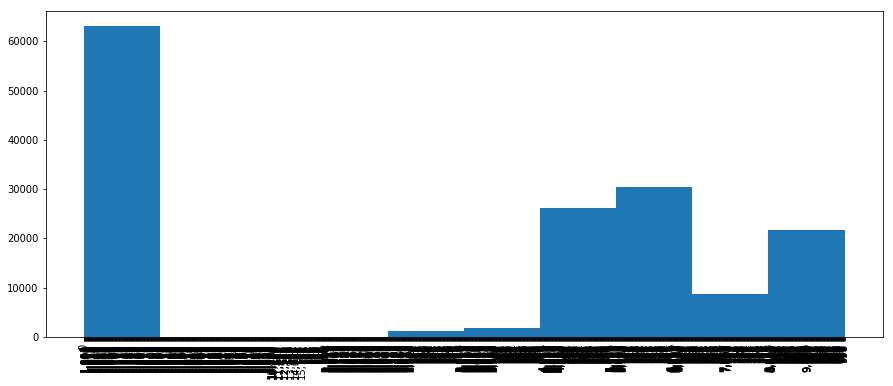

In [62]:
plt.figure(figsize=(15,6))
plt.hist(beer_df.Ratings,bins=10)
plt.xticks(rotation=90)

## Score

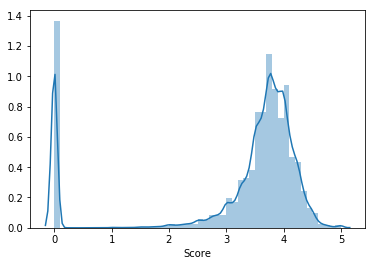

In [63]:
sns.distplot(beer_df.Score)

# Crosstabs

In [64]:
pd.crosstab(beer_df['Glassware Used'],beer_df['Serving Temperature'],dropna=False)

Serving Temperature,35-40,40-45,45-50,50-55
Glassware Used,,,,
Flute,0,47,0,0
"Flute,PilsenerGlass(orPokal)",0,1748,1509,0
"Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)",0,3306,623,0
"Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein),Stange(SlenderCylinder)",0,1504,814,0
"Flute,Snifter,OversizedWineGlass",0,0,0,67
"Flute,Snifter,Tulip",0,0,510,0
"Flute,Snifter,Tulip,Stange(SlenderCylinder)",0,0,367,103
"Flute,Stange(SlenderCylinder)",0,0,18,87
"Flute,Tulip,OversizedWineGlass",0,0,5084,0


In [65]:
#beer_df.loc[:,beer_df[]]
beer_df.loc[(beer_df['Serving Temperature'].isnull()), ['Glassware Used','Serving Temperature','Style Name']].count()

Glassware Used         173
Serving Temperature      0
Style Name             173
dtype: int64

In [66]:
beer_df[beer_df.ABV==5.1]['Cellar Temperature'].value_counts()

40-45    1006
35-40     967
45-50     105
Name: Cellar Temperature, dtype: int64

In [292]:
beer_df.loc[:,['ABV','Score']].sort_values(by=['Score'],ascending=False).head()

,ABV,Score
48459,4.6,5.0
22613,4.7,5.0
56007,6.2,5.0
121862,4.9,5.0
148917,7.2,5.0


In [293]:
pd.crosstab(index = beer_df['Style Name'],columns=beer_df['Serving Temperature'],dropna=False).head()

Serving Temperature,35-40,40-45,45-50,50-55
Style Name,,,,
Altbier,0,0,692,0
AmericanAdjunctLager,967,0,0,0
AmericanAmberRedAle,0,0,4928,0
AmericanAmberRedLager,0,532,0,0
AmericanBarleywine,0,0,0,1147


In [69]:
beer_df[(beer_df['Glassware Used'] == 'PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein)') &(beer_df['Food Paring'] == '(Barbecue)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar)Meat(Beef,SmokedMeat,Game,GrilledMeat,Salmon)')]['Cellar Temperature'].value_counts()

Series([], Name: Cellar Temperature, dtype: int64)

## Plotting

### Style Name vs ABV

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text xticklabel objects>)

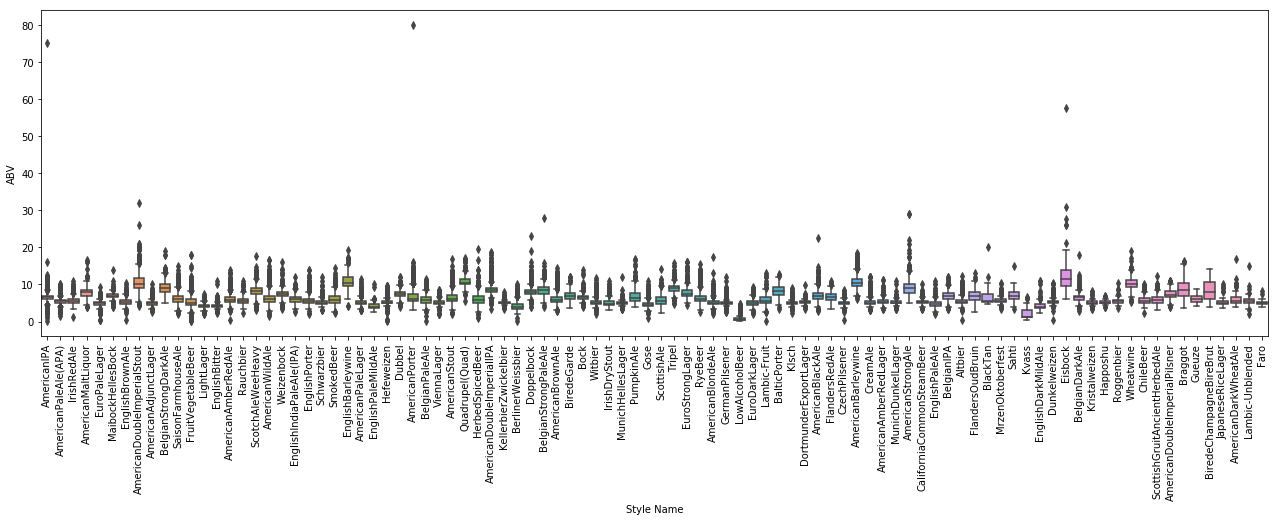

In [96]:
plt.figure(figsize=(22,6))
sns.boxplot('Style Name','ABV',data=beer_df)
plt.xticks(rotation=90)

In [290]:
beer_df.groupby('Style Name')['ABV'].mean().head()

Style Name
Altbier                   5.560058
AmericanAdjunctLager      4.906331
AmericanAmberRedAle       5.964428
AmericanAmberRedLager     5.394173
AmericanBarleywine       10.720567
Name: ABV, dtype: float64

In [291]:
beer_df.groupby('Style Name')['ABV'].median().head()

Style Name
Altbier                   5.300000
AmericanAdjunctLager      4.906331
AmericanAmberRedAle       5.700000
AmericanAmberRedLager     5.200000
AmericanBarleywine       10.500000
Name: ABV, dtype: float64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

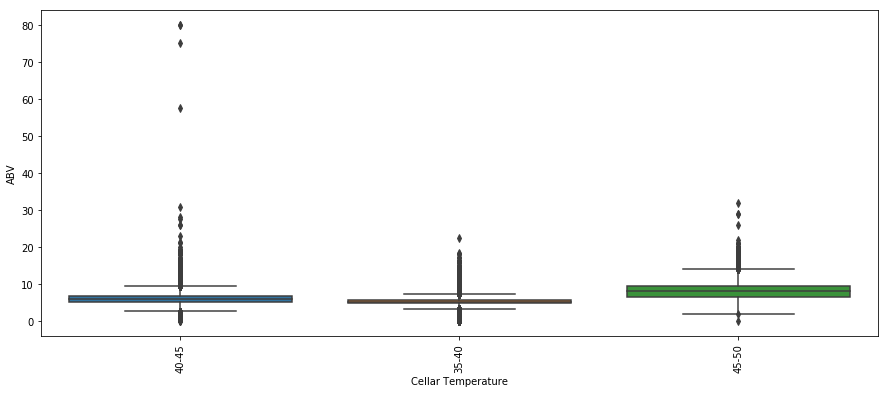

In [284]:
plt.figure(figsize=(15,6))
sns.boxplot('Cellar Temperature','ABV',data = beer_df)
plt.xticks(rotation=90)

In [286]:
beer_df.groupby('Cellar Temperature')['ABV'].median()

Cellar Temperature
35-40    5.2
40-45    6.0
45-50    8.1
Name: ABV, dtype: float64

In [14]:
beer_df['Brewing Company'] = beer_df['Brewing Company'].astype('object',copy=False)
beer_df['Brewing Company'].dtype

dtype('O')

In [15]:
beer_df['Ratings'] = beer_df['Ratings'].str.replace(',','')
beer_df['Ratings'].head()


0    22
1     1
2     3
3     0
4     1
Name: Ratings, dtype: object

In [16]:
combined_df['Ratings'] = combined_df['Ratings'].astype('int',copy=False)
combined_df['Ratings'].dtype

dtype('int32')